<a href="https://colab.research.google.com/github/mfadlisy/ML-Case-Study/blob/main/Analisa_Prediksi_Harga_Rumah_di_Jakarta_Selatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/My Google Colab/Dataset/harga_rumah_jaksel.csv')
df.head()

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,"28,000,000,000",1100,700,5,6,ADA,JAKSEL
1,"19,000,000,000",824,800,4,4,ADA,JAKSEL
2,"4,700,000,000",500,400,4,3,ADA,JAKSEL
3,"4,900,000,000",251,300,5,4,ADA,JAKSEL
4,"28,000,000,000",1340,575,4,5,ADA,JAKSEL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   object
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(4), object(3)
memory usage: 54.9+ KB


In [ ]:
df.describe( )

,LT,LB,JKT,JKM
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,530.504496,487.275724,4.457542,3.940060
std,531.069773,452.872262,2.004606,1.903261
min,22.000000,38.000000,1.000000,1.000000
25%,220.000000,300.000000,4.000000,3.000000
50%,400.000000,411.000000,4.000000,4.000000
75%,677.000000,600.000000,5.000000,4.000000
max,6790.000000,10000.000000,27.000000,27.000000


Dari hasil load data di atas, dapat kita temukan insight bahwa:
- Dari 5 data yang telah ditampilkan sekilas terlihat bahwa LT (Luas Tanah) dan LB (Luas Bangunan) sangat mempengaruhi harga, tentu ini masih sebuah asumsi awal, pada step berikutnya kita akan membutikannya.
- Pada informasi data type kolom `HARGA` adalah `object` yang seharusnya adalah `float`, kolom `GRS` bertipe `object` karena hanya berisi 2 nilai yaitu 'ADA' dan 'TIDAK ADA'. Untuk mempermudah proses analisis kita akan mengubah format data yang sesuai pada step berikutnya.
- Pada dataset ini tidak ada missing value, tetapi kita harus cek duplikasi data dan nilai outliers pada step berikutnya.
- Terdapat nilai yang membuat bingung, karena nilai maksimal JKT dan JKM adalah 27, yang mana ini akan menjadi outliers.kjskskmks Saya berasumsi bahwa ini adalah rumah kos-kosan dan akan mempertimbangkan untuk menghapus outliernya atau tidak di step berikutnya.

#Cleaning Data

##Cek Duplikasi Data

In [ ]:
# Menampilkan baris yang mengandung duplikasi data
print(df[df.duplicated()])

              HARGA    LT   LB  JKT  JKM        GRS    KOTA
106   8,000,000,000   323  317    5    4        ADA  JAKSEL
108   7,600,000,000   278  350    4    4        ADA  JAKSEL
124  40,000,000,000  1500  700    4    4        ADA  JAKSEL
166  15,000,000,000   714  750    5    5        ADA  JAKSEL
190   8,000,000,000   380  450    5    5        ADA  JAKSEL
..              ...   ...  ...  ...  ...        ...     ...
843  85,000,000,000   770  500    4    4        ADA  JAKSEL
856  14,900,000,000   291  400    4    4  TIDAK ADA  JAKSEL
879  15,000,000,000   291  400    4    4        ADA  JAKSEL
889   1,200,000,000    60   70    3    2        ADA  JAKSEL
912  13,000,000,000   616  600    5    4        ADA  JAKSEL

[70 rows x 7 columns]


In [ ]:
# Menampilkan jumlah data duplikat
print(f'Total duplikasi data sebanyak {df.duplicated().sum()} data')

Total duplikasi data sebanyak 70 data


In [ ]:
# Menghapus duplikasi data
df.drop_duplicates(inplace=True)

In [ ]:
# Menampilkan jumlah data duplikat yang sudah dihapus
print(f'Total duplikasi data sebanyak {df.duplicated().sum()} data')

# Menampilkan shape data
print(f'Shape data adalah {df.shape}')

Total duplikasi data sebanyak 0 data
Shape data adalah (931, 7)


##Mengatur Format Kolom

Pada tahapan ini akan dilakukan:
- Menghapus kolom 'KOTA' karena hanya berisikan 1 nilai saja yaitu 'JAKSEL'
- Mengubah nama kolom agar lebih mudah dibaca
- Mengubah tipe data kolom yang sesuai

In [ ]:
# Menghapus kolom 'Kota'
df_drop = df.drop('KOTA', axis=1, inplace=True)

In [ ]:
# Mengganti nama kolom
df.rename(columns={
    'HARGA':'harga',
    'LT':'luas_tanah',
    'LB':'luas_bangunan',
    'JKT':'kamar_tidur',
    'JKM':'kamar_mandi',
    'GRS':'garasi'
}, inplace=True)
df.head()

,harga,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,garasi
0,"28,000,000,000",1100,700,5,6,ADA
1,"19,000,000,000",824,800,4,4,ADA
2,"4,700,000,000",500,400,4,3,ADA
3,"4,900,000,000",251,300,5,4,ADA
4,"28,000,000,000",1340,575,4,5,ADA


In [ ]:
# Mengganti tipe data kolom 'harga' menjadi float
df['harga'] = df['harga'].str.replace(',', '').astype(float)

In [ ]:
df.head()

,harga,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,garasi
0,2.800000e+10,1100,700,5,6,ADA
1,1.900000e+10,824,800,4,4,ADA
2,4.700000e+09,500,400,4,3,ADA
3,4.900000e+09,251,300,5,4,ADA
4,2.800000e+10,1340,575,4,5,ADA


kolom harga sudah bertipe float, tetapi dengan bentuk seperti ini kita kesulitan untuk membaca berapa harga tersebut. Untuk itu kita dapat mengubahnya dalam jutaan

In [ ]:
df['harga(jt)'] = df['harga']//1000000

In [ ]:
df.head()

,harga,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,garasi,harga(jt)
0,2.800000e+10,1100,700,5,6,ADA,28000.0
1,1.900000e+10,824,800,4,4,ADA,19000.0
2,4.700000e+09,500,400,4,3,ADA,4700.0
3,4.900000e+09,251,300,5,4,ADA,4900.0
4,2.800000e+10,1340,575,4,5,ADA,28000.0


Pada kolom `garasi` nilai kategori akan dibuah menjadi 0 = 'Ada' dan 1 = 'Tidak Ada', untuk mempermudah proses analisis. Dengan menggunakan Label Encoding kita dapat mengubah kategorinya.

In [ ]:
# Import library LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk melakukan label encoding
df['garasi'] = label_encoder.fit_transform(df['garasi'])

# Menampilkan hasil
df.head()

,harga,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,garasi,harga(jt)
0,2.800000e+10,1100,700,5,6,0,28000.0
1,1.900000e+10,824,800,4,4,0,19000.0
2,4.700000e+09,500,400,4,3,0,4700.0
3,4.900000e+09,251,300,5,4,0,4900.0
4,2.800000e+10,1340,575,4,5,0,28000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   harga          931 non-null    float64
 1   luas_tanah     931 non-null    int64  
 2   luas_bangunan  931 non-null    int64  
 3   kamar_tidur    931 non-null    int64  
 4   kamar_mandi    931 non-null    int64  
 5   garasi         931 non-null    int64  
 6   harga(jt)      931 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 58.2 KB


#Explorasi Data Analisis

##Memeriksa Hubungan Linear Kolom

Pada tahap awal, kita berasumsi dengan melihat secara sekilas pada 5 data teratas bahwa luas_tanah dan luas_bangunan sangat mempengaruhi harga. Untuk itu kita akan melihat bagaimana hubungan linearnya.

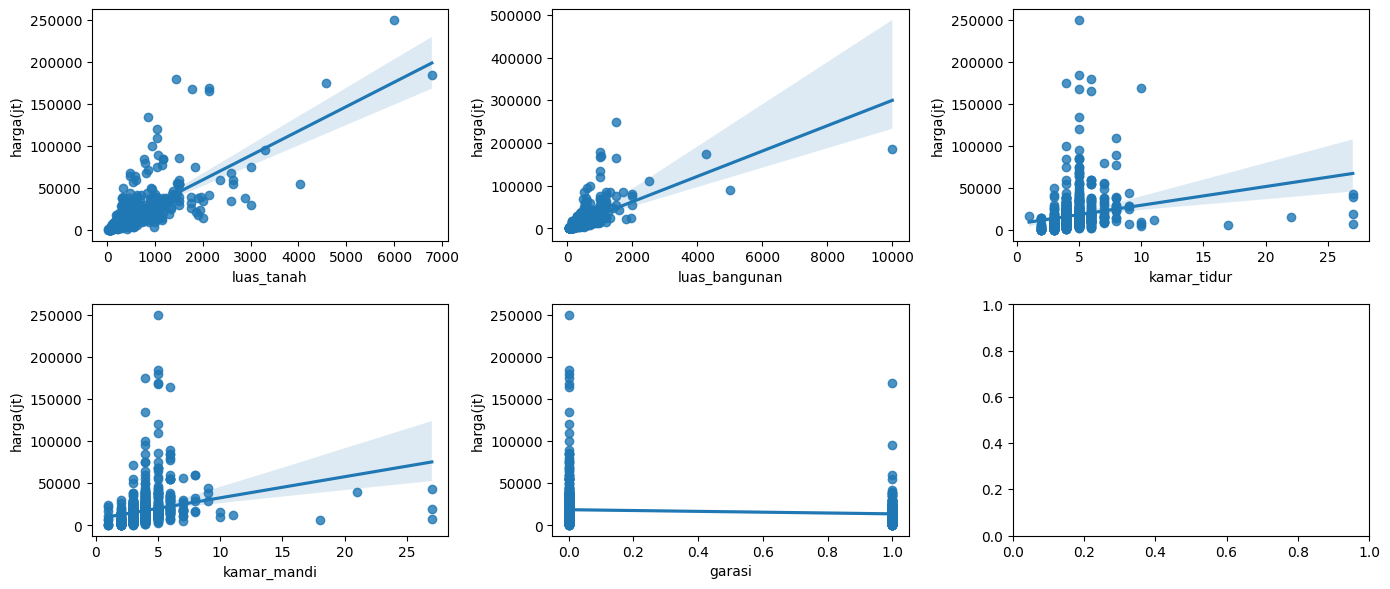

In [ ]:
# Membuat subplot dengan perulangan
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(14, 6), dpi=100)

# Daftar kolom
columns = ['luas_tanah','luas_bangunan','kamar_tidur','kamar_mandi','garasi']

# Melakukan perulangan
for i, column in enumerate(columns):
  row = i // 3
  col = i % 3
  sns.regplot(data=df, x=column, y="harga(jt)", ax=axs[row][col])

# Menampilkan plot
plt.tight_layout()
plt.show()

Dari hasil plot diatas menunjukkan bahwa hubungan linear `luas_tanah` dan `luas_bangunan` berpengaruh terhadap `harga`. Namun, apakah variabel lainnya tidak begitu berpengaruh? Untuk membuktikannya kita akan bandingan dengan cara pengelompokkan kategori harga dengan memanfaatkan metode quartile. Untuk itu, kita harus mengetahui bagaimana persebaran datanya dalam bentuk quartile.

In [ ]:
df.describe()

,harga,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,garasi,harga(jt)
count,9.310000e+02,931.000000,931.000000,931.00000,931.000000,931.000000,931.000000
mean,1.754738e+10,535.464017,488.788400,4.47261,3.921590,0.233083,17547.383459
std,2.120253e+10,543.800947,465.069974,2.06300,1.943635,0.423022,21202.533080
min,4.300000e+08,22.000000,38.000000,1.00000,1.000000,0.000000,430.000000
25%,6.750000e+09,217.000000,300.000000,4.00000,3.000000,0.000000,6750.000000
50%,1.300000e+10,400.000000,400.000000,4.00000,4.000000,0.000000,13000.000000
75%,2.000000e+10,682.500000,600.000000,5.00000,4.000000,0.000000,20000.000000
max,2.500000e+11,6790.000000,10000.000000,27.00000,27.000000,1.000000,250000.000000


Pada deskripsi data di atas pada kolom harga(jt) diketahui bahwa:
- harga terendah sebesar 430 juta
- quantile 25% sebesar 6,75 milyar
- quantile 50% sebesar 13 milyar
- quantile 75 sebesar 20 milyar
- harga tertinggi sebesar 250 milyar


In [ ]:
# Mengelompokan harga menjadi low_price, mid_price, dan high_price
df['kelas_harga'] = pd.qcut(df['harga(jt)'], q=3, labels=['low_price', 'mid_price', 'high_price'])

In [ ]:
df.head()

,harga,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,garasi,harga(jt),kelas_harga
0,2.800000e+10,1100,700,5,6,0,28000.0,high_price
1,1.900000e+10,824,800,4,4,0,19000.0,high_price
2,4.700000e+09,500,400,4,3,0,4700.0,low_price
3,4.900000e+09,251,300,5,4,0,4900.0,low_price
4,2.800000e+10,1340,575,4,5,0,28000.0,high_price


In [ ]:
category_counts = df['kelas_harga'].value_counts()
print(category_counts)

mid_price     316
low_price     313
high_price    302
Name: kelas_harga, dtype: int64


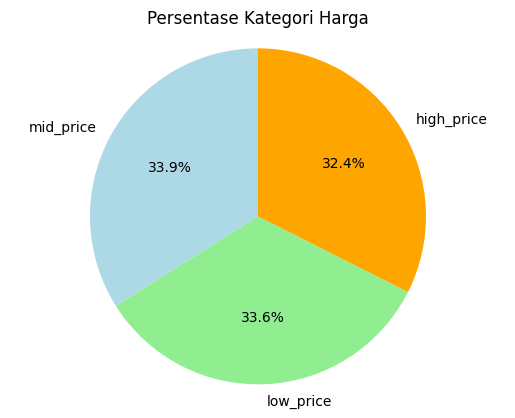

In [ ]:
# Memvisualiasikan berapa persentase dari kelas_harga menggunakan pie chart

# Menghitung jumlah data dalam setiap kategori
category_counts = df['kelas_harga'].value_counts()

# Menyiapkan label dan nilai untuk pie chart
labels = category_counts.index
sizes = category_counts.values

# Mengatur warna untuk setiap kategori harga
colors = ['lightblue', 'lightgreen', 'orange']

# Membuat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Kategori Harga')
plt.axis('equal')
plt.show()

Dari hasil plot diatas, diketahui bahwa mid_price adalah kelas_harga terbanyak, tetapi dengan perbedaan yang sangat sedikit terhadap low_price dan high_price, itu berarti harga rumah di wilayah jakarta selatan relatif sama berdasarkan kelas_harganya.

Sekarang kita akan melihat hubungan linear antara `kamar_tidur`, `kamar_mandi`, dan `garasi` terhadap `harga(jt)` dengan hue=`kelas_harga`.

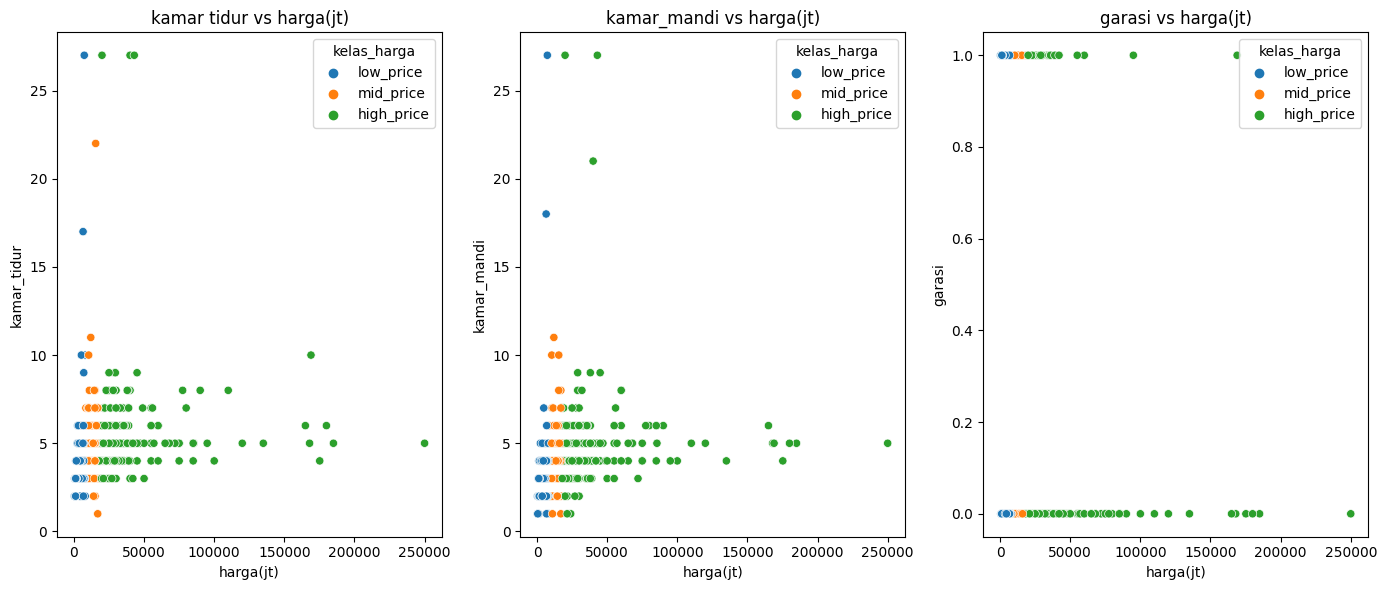

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(14, 6), dpi=100)

columns = ['kamar_tidur', 'kamar_mandi', 'garasi']
titles = ['kamar tidur vs harga(jt)', 'kamar_mandi vs harga(jt)', 'garasi vs harga(jt)']

for i, column in enumerate(columns):
  ax = axs[i]
  title = titles[i]

  sns.scatterplot(data=df, x='harga(jt)', y=column, hue='kelas_harga', ax=ax)
  ax.set_title(title)

plt.tight_layout()
plt.show()

Dari hasil plot diatas dapat diketahui bahwa ketiga kolom tersebut kurang begitu berpengaruh terhadap kolom harga. Untuk lebih meyakinkan lagi kita akan membuktikan dengan metode korelasi antara lain: pearson, kendall, dan spearman.

In [ ]:
correlation_methods = ['pearson', 'kendall', 'spearman']
correlation_columns = ['luas_tanah','luas_bangunan','kamar_tidur', 'kamar_mandi', 'garasi']

correlation_comparasion = pd.DataFrame(columns=['item'] + correlation_methods)

for column in correlation_columns:
    correlations = []
    for method in correlation_methods:
        correlation = df[column].corr(df['harga(jt)'], method=method)
        correlations.append(correlation)

    correlation_comparasion = correlation_comparasion.append({
        'item': f'harga vs {column}',
        'pearson': correlations[0],
        'kendall': correlations[1],
        'spearman': correlations[2]
    }, ignore_index=True)

correlation_comparasion

<ipython-input-106-e8823f7614ff>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_comparasion = correlation_comparasion.append({
<ipython-input-106-e8823f7614ff>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_comparasion = correlation_comparasion.append({
<ipython-input-106-e8823f7614ff>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_comparasion = correlation_comparasion.append({
<ipython-input-106-e8823f7614ff>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_comparasion = correlation_comparasion.append({
<ipython-input-106-e8823f7614ff>:12: FutureWarning: The frame.append method 

,item,pearson,kendall,spearman
0,harga vs luas_tanah,0.743441,0.658958,0.840090
1,harga vs luas_bangunan,0.651621,0.643624,0.817174
2,harga vs kamar_tidur,0.216394,0.378621,0.490354
3,harga vs kamar_mandi,0.229934,0.393497,0.508367
4,harga vs garasi,-0.098144,-0.114940,-0.140025


Untuk mengukur suatu hubungan linear adalah semakin dekat nilai korelasi dengan -1 dan 1, semakin kuat hubungan linearnya. Nilai mendekati 0 menunjukkan tidak adanya hubungan linear yang signifikan. Pada hasil diatas diketahui bahwa kolom luas_tanah dan luas_bangunan memiliki korelasi yang kuat dengan nilai mendekati 1, sedangkan kolom kamar_tidur, kamar_mandi, dan garasi memiliki nilai korelasi yang lemah.

## Memeriksa Distribusi Data
Selanjutnya, kita akan mencari tau bagaimana distribusi data, pada data ini terdapat outllier untuk itu kita harus memahami bagaimana suatu outlier terbentuk pada data ini, apakah ini merupakan variabilitas alami dalam data yang mungkin terjadi atau tidak. Untuk mengetahui distribusi data kita dapat menggunakan boxplot dan melihat bgaiaman nilai outliernya.

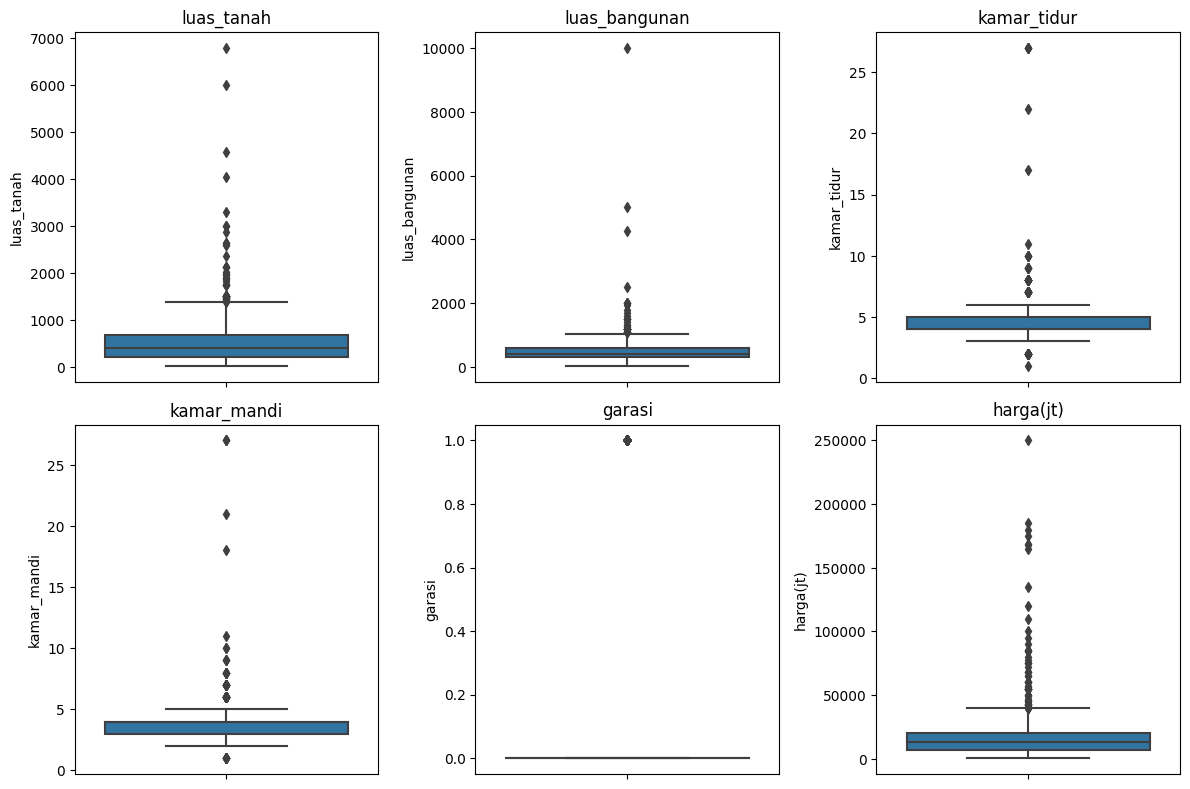

In [ ]:
columns = ['luas_tanah','luas_bangunan','kamar_tidur', 'kamar_mandi', 'garasi', 'harga(jt)']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, column in enumerate(columns):
  row = i // 3
  col = i % 3
  sns.boxplot(data=df, y=column, ax=axs[row, col])
  axs[row, col].set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
# Membuat fungsi untuk menghitung quartile dan menampilkan nilai outliersnya
def calculate_outlier_bounds(data, column):
    q1, q3 = np.percentile(data[column], [25, 75])
    iqr = q3 - q1
    ba = q3 + (1.5 * iqr)
    bw = q1 - (1.5 * iqr)

    dt = data[(data[column] < bw) | (data[column] > ba)]
    print(f'jumlah outliers {dt[column].count()}')
    return dt.sample(5)

In [ ]:
# Melihat nilai outliers kolom luas_tanah
calculate_outlier_bounds(df, 'luas_tanah')

jumlah outliers 44


,harga,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,garasi,harga(jt),kelas_harga
903,3.000000e+10,3000,500,4,4,0,30000.0,high_price
489,7.500000e+10,1830,1000,5,4,0,75000.0,high_price
385,2.500000e+11,6000,1500,5,5,0,250000.0,high_price
965,2.700000e+10,1752,712,3,2,0,27000.0,high_price
339,3.800000e+10,2880,1000,7,6,0,38000.0,high_price


In [ ]:
# Melihat nilai outliers kolom luas_bangunan
calculate_outlier_bounds(df, 'luas_bangunan')

jumlah outliers 37


,harga,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,garasi,harga(jt),kelas_harga
116,5.500000e+10,1497,1200,5,5,0,55000.0,high_price
385,2.500000e+11,6000,1500,5,5,0,250000.0,high_price
989,6.500000e+10,472,1200,5,5,0,65000.0,high_price
233,4.700000e+10,1375,1400,5,5,0,47000.0,high_price
415,3.900000e+10,973,1100,4,4,0,39000.0,high_price


In [ ]:
# Melihat nilai outliers kolom kamar_tidur
calculate_outlier_bounds(df, 'kamar_tidur')

jumlah outliers 78


,harga,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,garasi,harga(jt),kelas_harga
648,3.000000e+10,1500,600,7,7,0,30000.0,high_price
504,2.200000e+10,824,600,7,4,0,22000.0,high_price
553,4.000000e+10,1050,800,27,21,0,40000.0,high_price
975,2.000000e+10,292,800,27,27,1,20000.0,high_price
325,1.500000e+10,733,140,2,2,1,15000.0,mid_price


In [ ]:
# Melihat nilai outliers kolom kamar_mandi
calculate_outlier_bounds(df, 'kamar_mandi')

jumlah outliers 88


,harga,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,garasi,harga(jt),kelas_harga
694,2.600000e+10,1083,1200,6,6,0,26000.0,high_price
143,2.100000e+10,1042,550,7,6,0,21000.0,high_price
412,2.800000e+10,572,450,8,7,0,28000.0,high_price
691,3.800000e+10,1180,800,8,9,0,38000.0,high_price
362,2.000000e+10,600,890,6,6,0,20000.0,high_price


In [ ]:
# Melihat nilai outliers kolom harga(jt)
calculate_outlier_bounds(df, 'harga(jt)')

jumlah outliers 60


,harga,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,garasi,harga(jt),kelas_harga
872,4.200000e+10,709,500,3,4,1,42000.0,high_price
906,5.500000e+10,4035,1500,6,6,1,55000.0,high_price
113,5.500000e+10,1500,1200,7,6,0,55000.0,high_price
385,2.500000e+11,6000,1500,5,5,0,250000.0,high_price
482,4.300000e+10,1350,750,5,5,0,43000.0,high_price


Dari proses diatas, cukup masuk akan ketika kita menganggap bahwa nilai outlier yang terdapat dalam data adalah nilai yang alami dan valid dan tidak ada salah pencatatan, karena sebagai contoh luas tanah di atas 1700 masuk ke dalam kelas harga high price.

Tetapi, outlier tentu dapat mempengaruhi hasil analisis dan model, oleh karena itu, penting untuk memahami bagaimana dampak outlier nantinya. sebagai pertimbangan kita akan membandingkan hasil analisis dengan outlier dan tanpa outliers,

#Data Preprocessing

##Data Standardization
Dalam konteks regresi linear, standarisasi sering digunakan karena dapat membantu dalam menginterpretasikan koefisien regresi dan memudahkan perbandingan antara efek variabel independen terhadap variabel dependen. Standarisasi juga dapat membantu mengurangi multikolinieritas yang mungkin terjadi antara variabel independen.

In [ ]:
# Menghapus kolom 'kelas harga' dan 'harga' dari dataframe
df_clean = df.drop(['kelas_harga','harga'], axis=1)

# Menampilkan dataframe setelah menghapus kolom
df_clean.head()

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,garasi,harga(jt)
0,1100,700,5,6,0,28000.0
1,824,800,4,4,0,19000.0
2,500,400,4,3,0,4700.0
3,251,300,5,4,0,4900.0
4,1340,575,4,5,0,28000.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)
df_scaled = pd.DataFrame(df_scaled, columns=df_clean.columns)
print('\nData seteleh standarisasi:')
df_scaled.head()


Data seteleh standarisasi:


,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,garasi,harga(jt)
0,1.038688,0.454394,0.255780,1.069917,-0.551291,0.493254
1,0.530876,0.669531,-0.229212,0.040364,-0.551291,0.068548
2,-0.065250,-0.191017,-0.229212,-0.474413,-0.551291,-0.606262
3,-0.523384,-0.406154,0.255780,0.040364,-0.551291,-0.596824
4,1.480263,0.185473,-0.229212,0.555140,-0.551291,0.493254


##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('harga(jt)', axis=1)
y = df_scaled['harga(jt)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Data Modeling

##Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inisialisasi model
lr_model = LinearRegression()

# Melatih model
lr_model.fit(X_train, y_train)

# Melakukan predikasi pada data uji
y_pred = lr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Determination (R^2):", r2)

# # Visualisasi hasil
# plt.scatter(y_test, y_pred, color='blue')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
# plt.title('Multiple Linear Regression')
# plt.show()

Mean Squared Error (MSE): 1.2200964698708239
Root Mean Squared Error (RMSE): 1.1045797707141045
Coefficient of Determination (R^2): 0.4585163952703466


Hasil regressi yang diperoleh dapat disimpulkan bahwa model memiliki tingkat kesalahan yang relatif tinggi, Nilai MSE dan RMSE menunjukkan bahwa rata-rata perbedaan antara prediksi dan nilai sebenarnya adalah 1.22 dan 1.10, semakin rendah nilai MSE dan RMSE maka semakin baik. Selain itu, nilai R^2 menunjukkan bahwa 45.85% variasi dalam harga rumah dapat dijelaskan oleh fitur-fitur yang ada dalam model. Nilai R^2 yang lebih tinggi dianggap lebih baik.

Dalam kasus ini, hasil model tersebut masih bisa untuk ditingkatkan. Untuk meningkatkan kinerja model, ada beberapa langkah yang dapat dilakukan, yaitu:
- Pemilihan fitur yang lebih baik
- Tuning model
- Evaluasi dan validasi model lebih lanjut

##Improve Multiple Linear Regression

Kita telah mengetahui bahwa fitur luas_tanah dan luas_bangunan adalah fitur dengan korelasi yang kuat terhadap targetnya, Untuk itu kita hanya akan menggunakan kedua fitur ini agar dapat membantu kompleksitas model, mengurangi overfitting, dan yang paling penting adalah meningkatkan model.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Memilih Fitur
X = df_scaled[['luas_tanah','luas_bangunan']]
y = df_scaled['harga(jt)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model
model = LinearRegression()

# Mendefinisikan hyper parameter yang digunakan
parameters = {'fit_intercept': [True, False],
              'copy_X': [True, False]}

# Melakukan hyperparameter tuning menggunakan GridSearchCV
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Mendapatkan best hyperparameter
best_params = grid_search.best_params_

# Membuat model baru sesuai dengan best hyperparameter
best_model = LinearRegression(**best_params)

# Lakukan validasi silang k-fold dan hitung metrik evaluasi
k = 5
kf = KFold(n_splits=k, shuffle=True)
mse_scores = (cross_val_score(best_model, X, y, cv=k, scoring='neg_mean_squared_error'))
rmse_scores = np.sqrt(-mse_scores)
mae_scores = cross_val_score(best_model, X, y, cv=k, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(best_model, X, y, cv=k, scoring='r2')

# Menghitung semua skor rata-rata lipatan
mean_mse = np.mean(-mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(-mae_scores)
mean_r2 = np.mean(r2_scores)

# Menampilkan hasil
print("Best Hyperparameters:", best_params)
print("Mean Squared Error (MSE):", mean_mse)
print("Root Mean Squared Error (RMSE):", mean_rmse)
print("Mean Absolute Error (MAE):", mean_mae)
print("Coefficient of Determination (R^2):", mean_r2)

Best Hyperparameters: {'copy_X': True, 'fit_intercept': False}
Mean Squared Error (MSE): 0.4791728721952424
Root Mean Squared Error (RMSE): 0.6023372434904575
Mean Absolute Error (MAE): 0.29970692520059866
Coefficient of Determination (R^2): 0.5843549275896657


Dari hasil yang diperoleh dapat disumpulkan bahwa model memiliki hasil evaluasi yang positif dibanding hasil evaluasi model sebelumnya. Dapat dijabarkan sebagai berikut:
1. Kita mendapatkan Hyperparemter terbaik melalui proses tuning dengan menggunakan salinan data sebagai input model `('copy_X'=True)` dan tidak menggunakan pergeseran intercept dalam model regresi `('fit_intercept'=False)`
2. Mean Squared Error (MSE): 0.4791728721952424, MSE memiliki nilai yang relatif rendah, menunjukkan bahwa model Anda memberikan estimasi yang akurat dalam memprediksi harga rumah.
3. Root Mean Squared Error (RMSE): 0.6023372434904575. RMSE yang lebih rendah menunjukkan bahwa model memberikan estimasi yang lebih dekat dengan nilai sebenarnya.
4. Mean Absolute Error (MAE): 0.29970692520059866, MAE memiliki nilai yang relatif rendah, menunjukkan bahwa model Anda memberikan estimasi yang akurat dalam memprediksi harga rumah
5. Coefficient of Determination (R^2): 0.5843549275896657, menunjukkan bahwa model Anda dapat menjelaskan sekitar 58.4% variasi dalam data, yang dapat dianggap sebagai hasil yang baik.

Secara keseluruhan, hasil evaluasi yang diperoleh menunjukkan performa yang baik dalam memprediksi harga rumah. Namun, untuk menilai apakah hasil tersebut sudah bagus atau belum, Anda juga perlu membandingkannya dengan hasil yang diperoleh dari model lain atau mempertimbangkan tujuan dan konteks spesifik dari proyek Anda. Selalu penting untuk melihat secara komprehensif pada kinerja model, menguji dengan lebih banyak metrik evaluasi, dan mempertimbangkan aspek domain yang relevan.